# sahinbey bilsem hackathon kod sayfasidir

colabde grafik islemcide calismamiz icin ayarlari yapiyoruz. asagidaki kodla kontrol ediyoruz.

In [1]:

!nvidia-smi

Mon May  6 19:17:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

dizin adreslerini görmek için os kutuphanesini ekliyoruz.

In [2]:

import os
HOME = os.getcwd()
print(HOME)


/content


yeni bir model egitebilmek icin ultralytics kutuphanesini ekliyoruz.

In [3]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/78.2 GB disk)


yolov8 kutuphanesini ekliyoruz.

In [4]:

from ultralytics import YOLO

from IPython.display import display, Image

yolov8 tarafindan egitilmis bir modeli kullanarak herhangi bir resmi taniliyoruz.

In [5]:
%cd {HOME}
!yolo task=classify mode=predict model=yolov8n-cls.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'



/content
100% 5.30M/5.30M [00:00<00:00, 103MB/s]
Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 2715880 parameters, 0 gradients, 4.3 GFLOPs

100% 104k/104k [00:00<00:00, 122MB/s]
100% 755k/755k [00:00<00:00, 24.5MB/s]
image 1/1 /content/dog.jpeg: 224x224 seat_belt 0.28, Walker_hound 0.24, beagle 0.15, basset 0.11, Labrador_retriever 0.04, 3.1ms
Speed: 47.8ms preprocess, 3.1ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


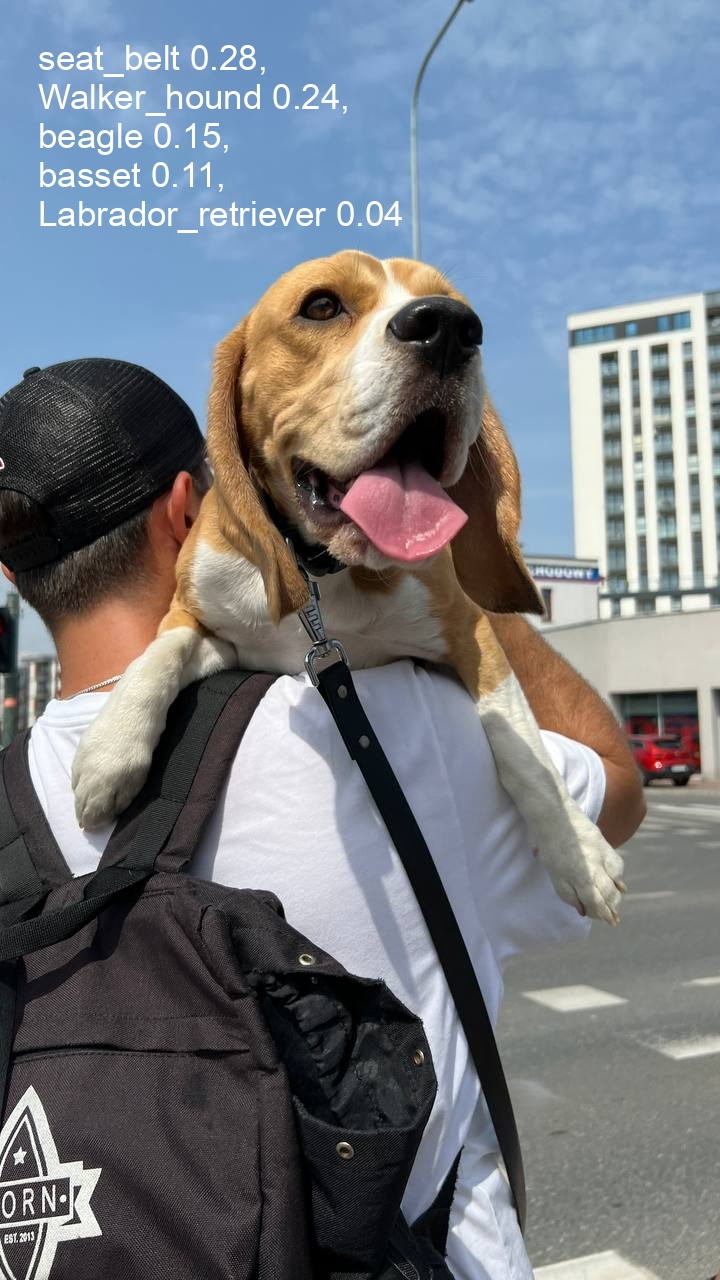

In [6]:
%cd {HOME}
Image(filename='runs/classify/predict/dog.jpeg', height=600)

buraya kadar colabde yolov8 kutuphanesinin calisabilirligini test ettik.

KENDI MODELIMIZI EGITME

kendi modelimizi egitmek icin roboflow sitesini kullandik. roboflow sitesi goruntuleri eklememize, boyutlandirmamiza,etiketlememize ve bu bilgilerden bir dataset olusturmamiza yarar.

modelimizi egitmek icin uc sinif olusturduk. bunlar park, kafe ve sehir siniflariydi. her siniftan 100er tane resim sectik. bu 300 resmi %70ini train icin, %20sini validation ve %10unu test icin kullandik. olusturdugumuz dataseti kullanmak icin roboflowdan asagidaki kodlari aldik.

In [7]:

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="VL5j5SJHGHWsyoUqvhZ1")
project = rf.workspace("ws-vwt6n").project("mekan")
version = project.version(2)
dataset = version.download("folder")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to mekan-2 in folder:: 100%|██████████| 312/312 [00:00<00:00, 3783.50it/s]


yolov8 kutuphanesinin classify gorevini, train modunu, yolov8n.pt modelini kullanarak modelimizi egittik. bu egitimi 128 image sizeda ve 50 epochsda gerceklestirdik.

In [8]:
%cd {HOME}

!yolo task=classify mode=train model=yolov8n-cls.pt data={dataset.location} epochs=50 imgsz=128

/content
Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/mekan-2, epochs=50, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

In [13]:
!ls -la {HOME}/runs/classify/train/


total 1020
drwxr-xr-x 3 root root   4096 May  6 19:37 .
drwxr-xr-x 4 root root   4096 May  6 19:35 ..
-rw-r--r-- 1 root root   1538 May  6 19:35 args.yaml
-rw-r--r-- 1 root root  96550 May  6 19:37 confusion_matrix_normalized.png
-rw-r--r-- 1 root root  85283 May  6 19:37 confusion_matrix.png
-rw-r--r-- 1 root root 137802 May  6 19:37 events.out.tfevents.1715024105.efd1ecfa28c2.4870.0
-rw-r--r-- 1 root root   9792 May  6 19:37 results.csv
-rw-r--r-- 1 root root  99679 May  6 19:37 results.png
-rw-r--r-- 1 root root  77401 May  6 19:35 train_batch0.jpg
-rw-r--r-- 1 root root  68885 May  6 19:35 train_batch1.jpg
-rw-r--r-- 1 root root  67263 May  6 19:35 train_batch2.jpg
-rw-r--r-- 1 root root  72892 May  6 19:37 train_batch520.jpg
-rw-r--r-- 1 root root  72297 May  6 19:37 train_batch521.jpg
-rw-r--r-- 1 root root  76610 May  6 19:37 train_batch522.jpg
-rw-r--r-- 1 root root  72648 May  6 19:37 val_batch0_labels.jpg
-rw-r--r-- 1 root root  72648 May  6 19:37 val_batch0_pred.jpg
drwxr-xr

In [14]:
!cat {HOME}/runs/classify/train/results.csv | head -10

                  epoch,             train/loss,  metrics/accuracy_top1,  metrics/accuracy_top5,               val/loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      1,                 1.1377,                    0.5,                      1,                  1.041,              8.568e-05,              8.568e-05,              8.568e-05
                      2,                0.96492,                0.76667,                      1,                0.95459,             0.00017497,             0.00017497,             0.00017497
                      3,                0.77331,                0.93333,                      1,                0.82471,             0.00026058,             0.00026058,             0.00026058
                      4,                0.60276,                      1,                      1,                 0.7207,             0.00034251,             0.00034251,             0.00034251
                      5,                

egittigimiz best.pt modelinin dogrulugunu sinamak icin yolov8 algoritmasini validation modunda calistirdik.

In [16]:

%cd {HOME}
print(dataset.location)
!yolo task=classify mode=val model={HOME}/runs/classify/train/weights/best.pt data={dataset.location}

/content
/content/mekan-2
Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/mekan-2/train... found 208 images in 3 classes ✅ 
val: /content/mekan-2/val... found 60 images in 3 classes ✅ 
test: /content/mekan-2/test... found 30 images in 3 classes ✅ 
val: Scanning /content/mekan-2/val... 60 images, 0 corrupt: 100% 60/60 [00:00<00:00, 4102.28it/s]
val: New cache created: /content/mekan-2/val.cache
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
               classes   top1_acc   top5_acc: 100% 4/4 [00:01<00:00,  3.49it/s]
                   all      0.967          1
Speed: 0.1ms preprocess, 5.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/cla

modelimizi test etmek icin yolov8 algoritmasini predict modunda calistirdik.

In [17]:
%cd {HOME}
!yolo task=classify mode=predict model={HOME}/runs/classify/train/weights/best.pt conf=0.25 source={dataset.location}/test/kafe



/content
Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs

image 1/10 /content/mekan-2/test/kafe/07_jpg.rf.a932ab808a77f227b1a70011e31d6ee5.jpg: 128x128 kafe 1.00, sehir 0.00, park 0.00, 4.6ms
image 2/10 /content/mekan-2/test/kafe/0a31393e89c02de6619fcf52b88c0aa2_jpg.rf.42a040311090ca7b562a36016c3c8c20.jpg: 128x128 kafe 1.00, sehir 0.00, park 0.00, 2.8ms
image 3/10 /content/mekan-2/test/kafe/1025x550_hogeschoolplein_terras_zomerckarlbruninx__jpg.rf.4b62d11d31cd5b57ea3778825cfb31db.jpg: 128x128 kafe 1.00, sehir 0.00, park 0.00, 5.4ms
image 4/10 /content/mekan-2/test/kafe/3219374331_jpg.rf.4e14b1fd9d11430e9d9f68c51ee37047.jpg: 128x128 kafe 1.00, sehir 0.00, park 0.00, 2.7ms
image 5/10 /content/mekan-2/test/kafe/KK_1417_28-33_Kaffeehauser_Budapest_Kaffeehaus_New_York_gros_jpg.rf.bdf294102a56494c751a29a0579a8b25.jpg: 128x128 kafe 0.99, sehir 0.01, park 0.00, 3.1ms
image

In [21]:
%cd {HOME}
!yolo task=classify mode=predict model={HOME}/runs/classify/train/weights/best.pt conf=0.25 source={dataset.location}/test/park/Utfarder_och_solbad_i_Kuppisparken_2011_jpg.rf.e26700a4471ce88db0b3226828224206.jpg


/content
Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs

image 1/1 /content/mekan-2/test/park/Utfarder_och_solbad_i_Kuppisparken_2011_jpg.rf.e26700a4471ce88db0b3226828224206.jpg: 128x128 park 1.00, sehir 0.00, kafe 0.00, 4.1ms
Speed: 8.0ms preprocess, 4.1ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)
Results saved to runs/classify/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


bu bolumde yapay zeka tarafindan siniflandirilmis resimleri ve dogruluk yuzdesini gormekteyiz.

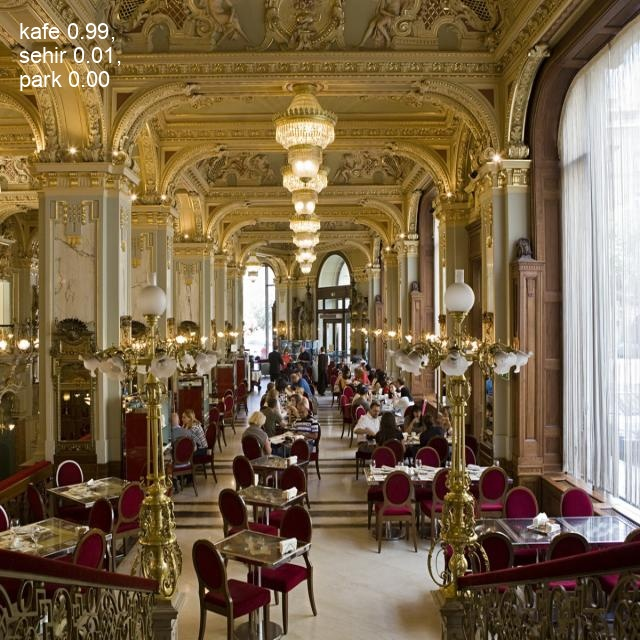

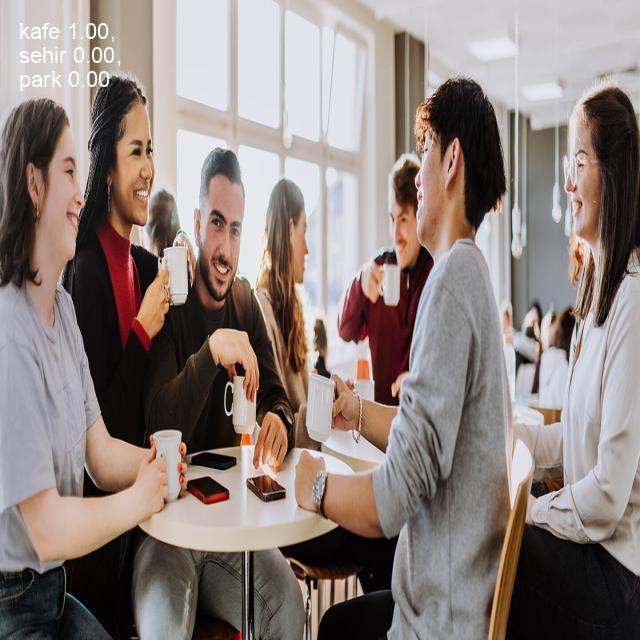

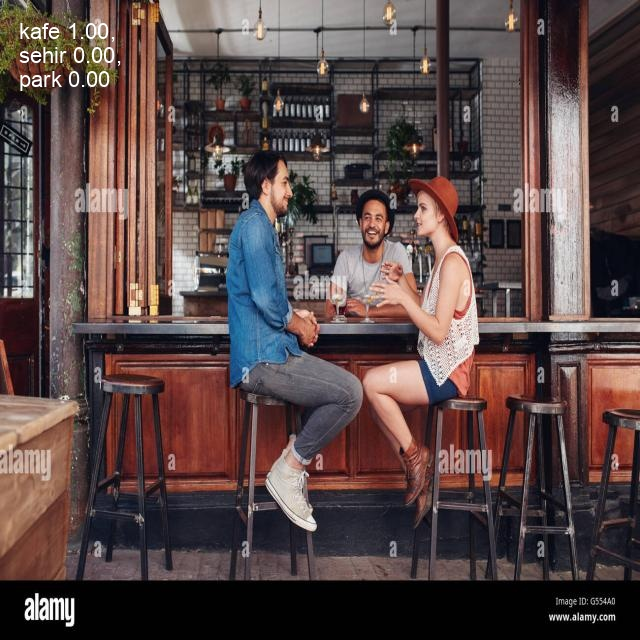

In [26]:

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/classify/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")